# Summary statistics

`ScmRun` objects have methods specific to calculating summary statistics. In this notebook we demonstrate them.

In [1]:
# NBVAL_IGNORE_OUTPUT
import traceback

import matplotlib.pyplot as plt
import numpy as np

from scmdata.run import ScmRun, run_append

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)

## Helper bits and piecs

In [3]:
def new_timeseries(
    n=101,
    count=1,
    model="example",
    scenario="ssp119",
    variable="Surface Temperature",
    unit="K",
    region="World",
    cls=ScmRun,
    **kwargs,
):
    data = np.random.rand(n, count) * np.arange(n)[:, np.newaxis]
    index = 2000 + np.arange(n)
    return cls(
        data,
        columns={
            "model": model,
            "scenario": scenario,
            "variable": variable,
            "region": region,
            "unit": unit,
            **kwargs,
        },
        index=index,
    )

Let's create an `ScmRun` which contains a few variables and a number of runs. Such a dataframe would be used to store the results from an ensemble of simple climate model runs.

In [4]:
# NBVAL_IGNORE_OUTPUT
runs = run_append(
    [
        new_timeseries(
            count=3,
            variable=[
                "Surface Temperature",
                "Atmospheric Concentrations|CO2",
                "Radiative Forcing",
            ],
            unit=["K", "ppm", "W/m^2"],
            run_id=run_id,
        )
        for run_id in range(10)
    ]
)
runs.metadata["source"] = "fake data"
runs

<scmdata.ScmRun (timeseries: 30, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      model region  run_id scenario   unit                        variable
	0   example  World       0   ssp119      K             Surface Temperature
	1   example  World       0   ssp119    ppm  Atmospheric Concentrations|CO2
	2   example  World       0   ssp119  W/m^2               Radiative Forcing
	3   example  World       1   ssp119      K             Surface Temperature
	4   example  World       1   ssp119    ppm  Atmospheric Concentrations|CO2
	5   example  World       1   ssp119  W/m^2               Radiative Forcing
	6   example  World       2   ssp119      K             Surface Temperature
	7   example  World       2   ssp119    ppm  Atmospheric Concentrations|CO2
	8   example  World       2   ssp119  W/m^2               Radiative Forcing
	9   example  World       3   ssp119      K             Surface Temperature
	10  example  World       3   ssp119    ppm  At

## `process_over`

The `process_over` method allows us to calculate a specific set of statistics.

In [5]:
print(runs.process_over.__doc__)


        Process the data over the input columns.

        Parameters
        ----------
        cols
            Columns to perform the operation on. The timeseries will be grouped by all
            other columns in :attr:`meta`.

        operation : ['median', 'mean', 'quantile']
            The operation to perform. This uses the equivalent pandas function. Note
            that quantile means the value of the data at a given point in the cumulative
            distribution of values at each point in the timeseries, for each timeseries
            once the groupby is applied. As a result, using ``q=0.5`` is is the same as
            taking the median and not the same as taking the mean/average.

        na_override: [int, float]
            Convert any nan value in the timeseries meta to this value during processsing.
            The meta values converted back to nan's before the dataframe is returned. This
            should not need to be changed unless the existing metadata cla

### Mean

In [6]:
# NBVAL_IGNORE_OUTPUT
mean = runs.process_over(cols="run_id", operation="mean")
mean

time                                                          2000-01-01  \
model   unit  variable                       region scenario               
example K     Surface Temperature            World  ssp119           0.0   
        W/m^2 Radiative Forcing              World  ssp119           0.0   
        ppm   Atmospheric Concentrations|CO2 World  ssp119           0.0   

time                                                          2001-01-01  \
model   unit  variable                       region scenario               
example K     Surface Temperature            World  ssp119      0.465058   
        W/m^2 Radiative Forcing              World  ssp119      0.615310   
        ppm   Atmospheric Concentrations|CO2 World  ssp119      0.642708   

time                                                          2002-01-01  \
model   unit  variable                       region scenario               
example K     Surface Temperature            World  ssp119      1.205525   
        W/m^2 Radiative Forcing              World  ssp119      0.844998   
        ppm   Atmospheric Concentrations|CO2 World  ssp119      0.978895   

time                                                          2003-01-01  \
model   unit  variable                       region scenario               
example K     Surface Temperature            World  ssp119      1.259395   
        W/m^2 Radiative Forcing              World  ssp119      1.344634   
        ppm   Atmospheric Concentrations|CO2 World  ssp119      1.181667   

time                                                          2004-01-01  \
model   unit  variable                       region scenario               
example K     Surface Temperature            World  ssp119      2.117701   
        W/m^2 Radiative Forcing              World  ssp119      1.712903   
        ppm   Atmospheric Concentrations|CO2 World  ssp119      1.141099   

time                                                          2005-01-01  \
model   unit  variable                       region scenario               
example K     Surface Temperature            World  ssp119      2.286875   
        W/m^2 Radiative Forcing              World  ssp119      3.144800   
        ppm   Atmospheric Concentrations|CO2 World  ssp119      1.667380   

time                                                          2006-01-01  \
model   unit  variable                       region scenario               
example K     Surface Temperature            World  ssp119      1.962543   
        W/m^2 Radiative Forcing              World  ssp119      3.274671   
        ppm   Atmospheric Concentrations|CO2 World  ssp119      2.717578   

time                                                          2007-01-01  \
model   unit  variable                       region scenario               
example K     Surface Temperature            World  ssp119      3.219168   
        W/m^2 Radiative Forcing              World  ssp119      3.658637   
        ppm   Atmospheric Concentrations|CO2 World  ssp119      3.434878   

time                                                          2008-01-01  \
model   unit  variable                       region scenario               
example K     Surface Temperature            World  ssp119      3.612593   
        W/m^2 Radiative Forcing              World  ssp119      4.312988   
        ppm   Atmospheric Concentrations|CO2 World  ssp119      3.041312   

time                                                          2009-01-01  ...  \
model   unit  variable                       region scenario              ...   
example K     Surface Temperature            World  ssp119      5.458669  ...   
        W/m^2 Radiative Forcing              World  ssp119      2.891239  ...   
        ppm   Atmospheric Concentrations|CO2 World  ssp119      4.489207  ...   

time                                                          2091-01-01  \
model   unit  variable                       region scenario               
example K    

### Median

In [7]:
# NBVAL_IGNORE_OUTPUT
median = runs.process_over(cols="run_id", operation="median")
median

time                                                          2000-01-01  \
model   unit  variable                       region scenario               
example K     Surface Temperature            World  ssp119           0.0   
        W/m^2 Radiative Forcing              World  ssp119           0.0   
        ppm   Atmospheric Concentrations|CO2 World  ssp119           0.0   

time                                                          2001-01-01  \
model   unit  variable                       region scenario               
example K     Surface Temperature            World  ssp119      0.448246   
        W/m^2 Radiative Forcing              World  ssp119      0.677295   
        ppm   Atmospheric Concentrations|CO2 World  ssp119      0.680516   

time                                                          2002-01-01  \
model   unit  variable                       region scenario               
example K     Surface Temperature            World  ssp119      1.181083   
        W/m^2 Radiative Forcing              World  ssp119      0.836829   
        ppm   Atmospheric Concentrations|CO2 World  ssp119      0.827020   

time                                                          2003-01-01  \
model   unit  variable                       region scenario               
example K     Surface Temperature            World  ssp119      1.356345   
        W/m^2 Radiative Forcing              World  ssp119      1.502504   
        ppm   Atmospheric Concentrations|CO2 World  ssp119      1.022049   

time                                                          2004-01-01  \
model   unit  variable                       region scenario               
example K     Surface Temperature            World  ssp119      1.914644   
        W/m^2 Radiative Forcing              World  ssp119      1.515825   
        ppm   Atmospheric Concentrations|CO2 World  ssp119      0.450622   

time                                                          2005-01-01  \
model   unit  variable                       region scenario               
example K     Surface Temperature            World  ssp119      2.218513   
        W/m^2 Radiative Forcing              World  ssp119      3.716538   
        ppm   Atmospheric Concentrations|CO2 World  ssp119      1.124385   

time                                                          2006-01-01  \
model   unit  variable                       region scenario               
example K     Surface Temperature            World  ssp119      1.528965   
        W/m^2 Radiative Forcing              World  ssp119      3.148478   
        ppm   Atmospheric Concentrations|CO2 World  ssp119      2.226495   

time                                                          2007-01-01  \
model   unit  variable                       region scenario               
example K     Surface Temperature            World  ssp119      3.296956   
        W/m^2 Radiative Forcing              World  ssp119      3.965456   
        ppm   Atmospheric Concentrations|CO2 World  ssp119      3.108121   

time                                                          2008-01-01  \
model   unit  variable                       region scenario               
example K     Surface Temperature            World  ssp119      3.203654   
        W/m^2 Radiative Forcing              World  ssp119      4.500849   
        ppm   Atmospheric Concentrations|CO2 World  ssp119      3.076214   

time                                                          2009-01-01  ...  \
model   unit  variable                       region scenario              ...   
example K     Surface Temperature            World  ssp119      5.919068  ...   
        W/m^2 Radiative Forcing              World  ssp119      3.279160  ...   
        ppm   Atmospheric Concentrations|CO2 World  ssp119      4.402614  ...   

time                                                          2091-01-01  \
model   unit  variable                       region scenario               
example K    

### Other quantiles

In [8]:
# NBVAL_IGNORE_OUTPUT
lower_likely_quantile = runs.process_over(cols="run_id", operation="quantile", q=0.17)
lower_likely_quantile

time                                                          2000-01-01  \
model   unit  variable                       region scenario               
example K     Surface Temperature            World  ssp119           0.0   
        W/m^2 Radiative Forcing              World  ssp119           0.0   
        ppm   Atmospheric Concentrations|CO2 World  ssp119           0.0   

time                                                          2001-01-01  \
model   unit  variable                       region scenario               
example K     Surface Temperature            World  ssp119      0.203284   
        W/m^2 Radiative Forcing              World  ssp119      0.347820   
        ppm   Atmospheric Concentrations|CO2 World  ssp119      0.403968   

time                                                          2002-01-01  \
model   unit  variable                       region scenario               
example K     Surface Temperature            World  ssp119      0.832019   
        W/m^2 Radiative Forcing              World  ssp119      0.400325   
        ppm   Atmospheric Concentrations|CO2 World  ssp119      0.530364   

time                                                          2003-01-01  \
model   unit  variable                       region scenario               
example K     Surface Temperature            World  ssp119      0.538120   
        W/m^2 Radiative Forcing              World  ssp119      0.497000   
        ppm   Atmospheric Concentrations|CO2 World  ssp119      0.326554   

time                                                          2004-01-01  \
model   unit  variable                       region scenario               
example K     Surface Temperature            World  ssp119      1.030702   
        W/m^2 Radiative Forcing              World  ssp119      0.716592   
        ppm   Atmospheric Concentrations|CO2 World  ssp119      0.192225   

time                                                          2005-01-01  \
model   unit  variable                       region scenario               
example K     Surface Temperature            World  ssp119      0.881840   
        W/m^2 Radiative Forcing              World  ssp119      1.604435   
        ppm   Atmospheric Concentrations|CO2 World  ssp119      0.474390   

time                                                          2006-01-01  \
model   unit  variable                       region scenario               
example K     Surface Temperature            World  ssp119      0.413533   
        W/m^2 Radiative Forcing              World  ssp119      2.617882   
        ppm   Atmospheric Concentrations|CO2 World  ssp119      0.970653   

time                                                          2007-01-01  \
model   unit  variable                       region scenario               
example K     Surface Temperature            World  ssp119      0.644489   
        W/m^2 Radiative Forcing              World  ssp119      2.489112   
        ppm   Atmospheric Concentrations|CO2 World  ssp119      1.237647   

time                                                          2008-01-01  \
model   unit  variable                       region scenario               
example K     Surface Temperature            World  ssp119      1.535847   
        W/m^2 Radiative Forcing              World  ssp119      1.781391   
        ppm   Atmospheric Concentrations|CO2 World  ssp119      0.862551   

time                                                          2009-01-01  ...  \
model   unit  variable                       region scenario              ...   
example K     Surface Temperature            World  ssp119      2.545843  ...   
        W/m^2 Radiative Forcing              World  ssp119      0.725017  ...   
        ppm   Atmospheric Concentrations|CO2 World  ssp119      2.682316  ...   

time                                                          2091-01-01  \
model   unit  variable                       region scenario               
example K    

## `quantiles_over`

If you want to calculate more than one summary statistic, `quantiles_over` will calculate and label multiple summary statistics before returning them.

In [9]:
print(runs.quantiles_over.__doc__)


        Calculate quantiles of the data over the input columns.

        Parameters
        ----------
        cols
            Columns to perform the operation on. The timeseries will be grouped by all
            other columns in :attr:`meta`.

        quantiles
            The quantiles to calculate. This should be a list of quantiles to calculate
            (quantile values between 0 and 1). ``quantiles`` can also include the strings
            "median" or "mean" if these values are to be calculated.

        **kwargs
            Passed to :meth:`~ScmRun.process_over`.

        Returns
        -------
        :obj:`pd.DataFrame`
            The quantiles of the timeseries, grouped by all columns in :attr:`meta`
            other than :obj:`cols`. Each calculated quantile is given a label which is
            stored in the ``quantile`` column within the output index.

        Raises
        ------
        TypeError
            ``operation`` is included in ``kwargs``. The operatio

In [10]:
# NBVAL_IGNORE_OUTPUT
summary_stats = runs.quantiles_over(cols="run_id", quantiles=[0.05, 0.17, 0.83, 0.95, "mean", "median"])
summary_stats

time                                                                   2000-01-01  \
model   unit  variable                       region scenario quantile               
example K     Surface Temperature            World  ssp119   0.05             0.0   
        W/m^2 Radiative Forcing              World  ssp119   0.05             0.0   
        ppm   Atmospheric Concentrations|CO2 World  ssp119   0.05             0.0   
        K     Surface Temperature            World  ssp119   0.17             0.0   
        W/m^2 Radiative Forcing              World  ssp119   0.17             0.0   
        ppm   Atmospheric Concentrations|CO2 World  ssp119   0.17             0.0   
        K     Surface Temperature            World  ssp119   0.83             0.0   
        W/m^2 Radiative Forcing              World  ssp119   0.83             0.0   
        ppm   Atmospheric Concentrations|CO2 World  ssp119   0.83             0.0   
        K     Surface Temperature            World  ssp119   0.95             0.0   
        W/m^2 Radiative Forcing              World  ssp119   0.95             0.0   
        ppm   Atmospheric Concentrations|CO2 World  ssp119   0.95             0.0   
        K     Surface Temperature            World  ssp119   mean             0.0   
        W/m^2 Radiative Forcing              World  ssp119   mean             0.0   
        ppm   Atmospheric Concentrations|CO2 World  ssp119   mean             0.0   
        K     Surface Temperature            World  ssp119   median           0.0   
        W/m^2 Radiative Forcing              World  ssp119   median           0.0   
        ppm   Atmospheric Concentrations|CO2 World  ssp119   median           0.0   

time                                                                   2001-01-01  \
model   unit  variable                       region scenario quantile               
example K     Surface Temperature            World  ssp119   0.05        0.154456   
        W/m^2 Radiative Forcing              World  ssp119   0.05        0.063156   
        ppm   Atmospheric Concentrations|CO2 World  ssp119   0.05        0.178393   
        K     Surface Temperature            World  ssp119   0.17        0.203284   
        W/m^2 Radiative Forcing              World  ssp119   0.17        0.347820   
        ppm   Atmospheric Concentrations|CO2 World  ssp119   0.17        0.403968   
        K     Surface Temperature            World  ssp119   0.83        0.738225   
        W/m^2 Radiative Forcing              World  ssp119   0.83        0.874042   
        ppm   Atmospheric Concentrations|CO2 World  ssp119   0.83        0.949227   
        K     Surface Temperature            World  ssp119   0.95        0.823551   
        W/m^2 Radiative Forcing              World  ssp119   0.95        0.951678   
        ppm   Atmospheric Concentrations|CO2 World  ssp119   0.95        0.974913   
        K     Surface Temperature            World  ssp119   mean        0.465058   
        W/m^2 Radiative Forcing              World  ssp119   mean        0.615310   
        ppm   Atmospheric Concentrations|CO2 World  ssp119   mean        0.642708   
        K     Surface Temperature            World  ssp119   median      0.448246   
        W/m^2 Radiative Forcing              World  ssp119   median      0.677295   
        ppm   Atmospheric Concentrations|CO2 World  ssp119   median      0.680516   

time                                                                   2002-01-01  \
model   unit  variable                       region scenario quantile               
example K     Surface Temperature            World  ssp119   0.05        0.750299   
        W/m^2 Radiative Forcing              World  ssp119   0.05        0.222247   
        ppm   Atmospheric Concentrations|CO2 World  ssp119   0.05        0.267494   
        K     Surface Temperature            World  ssp119   0.17        0.832019   
        W/m^2 Radiative Forcing              World  ssp119   0.17        0.400325   
   

### Plotting

We can then cast the output of `quantiles_over` to an `ScmRun` object for ease of filtering and plotting.

In [11]:
summary_stats_scmrun = ScmRun(summary_stats)
summary_stats_scmrun

<scmdata.ScmRun (timeseries: 18, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      model quantile region scenario   unit                        variable
	0   example     0.05  World   ssp119      K             Surface Temperature
	1   example     0.05  World   ssp119  W/m^2               Radiative Forcing
	2   example     0.05  World   ssp119    ppm  Atmospheric Concentrations|CO2
	3   example     0.17  World   ssp119      K             Surface Temperature
	4   example     0.17  World   ssp119  W/m^2               Radiative Forcing
	5   example     0.17  World   ssp119    ppm  Atmospheric Concentrations|CO2
	6   example     0.83  World   ssp119      K             Surface Temperature
	7   example     0.83  World   ssp119  W/m^2               Radiative Forcing
	8   example     0.83  World   ssp119    ppm  Atmospheric Concentrations|CO2
	9   example     0.95  World   ssp119      K             Surface Temperature
	10  example     0.95  World   ssp11

<AxesSubplot:xlabel='time', ylabel='W/m^2'>

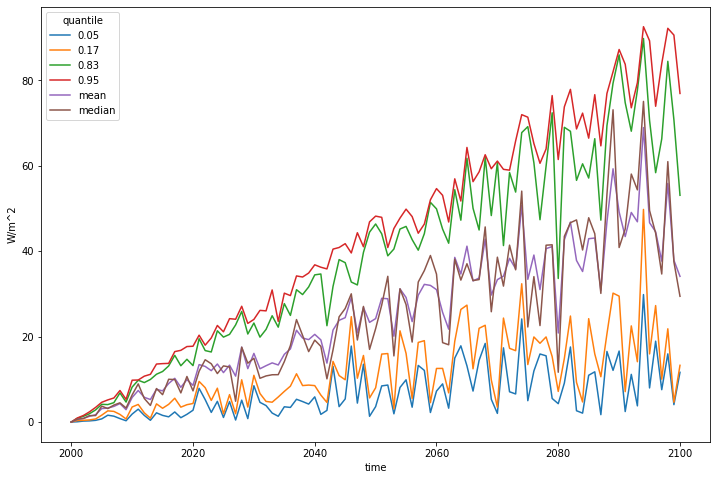

In [12]:
# NBVAL_IGNORE_OUTPUT
summary_stats_scmrun.filter(variable="Radiative Forcing").lineplot(hue="quantile")

TODO in next PR: add plumeplot method to ScmRun